In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

we need descriptive plots

In [36]:
df.columns

Index(['date', 'act_symbol', 'expiration', 'strike', 'call_put', 'bid', 'ask',
       'vol', 'delta', 'gamma', 'theta', 'vega', 'rho', 'date_year',
       'date_month', 'date_day', 'current_stock_price',
       'stock_price_at_expiration', 'moneyness', 'position', 'opt_price',
       'profit', 'stock_delta_60days', 'profit_cat'],
      dtype='object')

In [3]:
df = pd.read_csv("cleaned_optData_with_prices_new.csv")

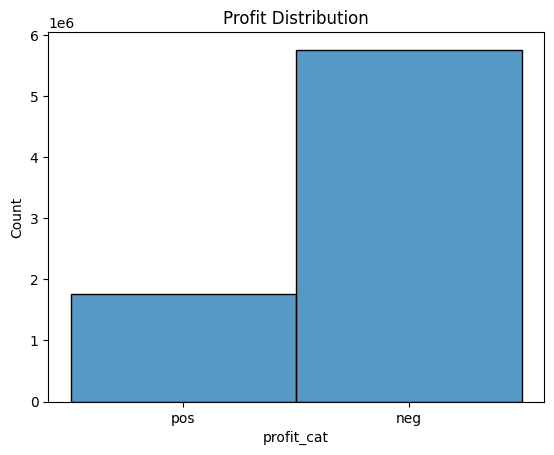

In [4]:
df["profit_cat"] = df["profit"].apply(lambda x: "pos" if x > 0 else "neg")
sns.histplot(x="profit_cat", data=df, bins=2, discrete=True)
plt.title("Profit Distribution")
plt.show()

In [5]:
print(df["profit"].min())
print(df["profit"].max())
print(df["profit"].mean())
print(df["profit"].median())

-4107.354501342774
3110.8545013427733
-9.724592341630336
-3.509999847412109


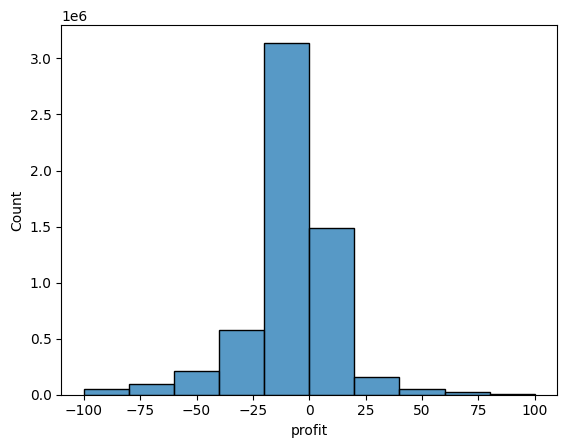

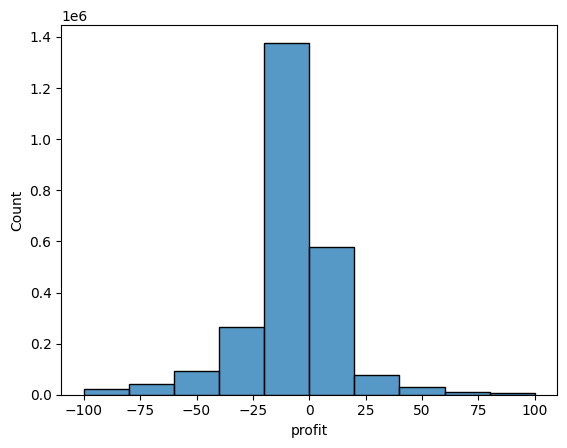

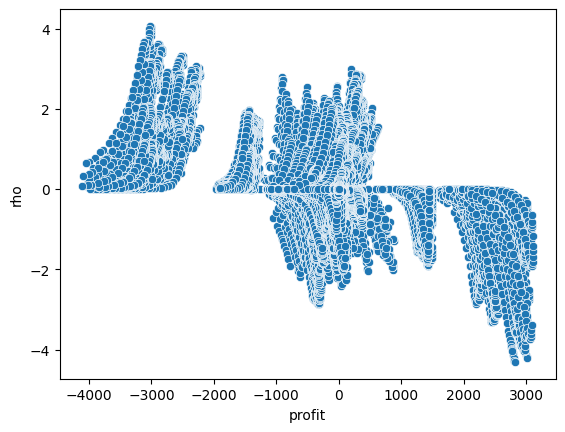

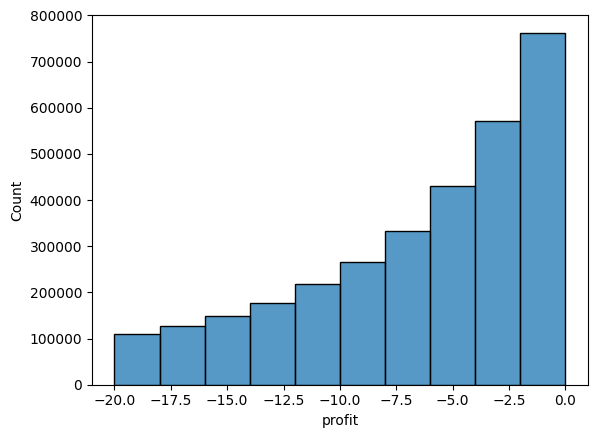

In [31]:
profit = df[(df["profit"] > -100) & (df["profit"] < 100)]["profit"]
sns.histplot(profit, bins=10)
plt.show()

profit = df[(df["profit"] > -100) & (df["profit"] < 100) & (df["rho"] < 0)]["profit"]
sns.histplot(profit, bins=10)
plt.show()

sns.scatterplot(x="profit", y="rho", data=df)
plt.show()


neg_profit = df[(df["profit"] < 0) & (df["profit"] > -20)]["profit"]
sns.histplot(neg_profit, bins=10)
plt.show()

In [39]:
df

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,...,current_stock_price,stock_price_at_expiration,moneyness,position,opt_price,profit,stock_delta_60days,profit_cat,Call,call
0,2020-01-04,A,2020-01-17,72.5,Call,11.75,12.90,0.2345,0.9997,0.0003,...,84.570000,90.120003,17.620003,ITM,12.325,5.295003,NaN,pos,1,1
1,2020-01-04,A,2020-01-17,72.5,Put,0.01,0.03,0.2421,-0.0005,0.0004,...,84.570000,90.120003,-17.620003,OTM,0.020,-17.640003,NaN,neg,0,0
2,2020-01-04,A,2020-01-17,75.0,Call,8.05,10.20,0.2345,0.9960,0.0030,...,84.570000,90.120003,15.120003,ITM,9.125,5.995003,NaN,pos,1,1
3,2020-01-04,A,2020-01-17,75.0,Put,0.01,0.10,0.2421,-0.0051,0.0036,...,84.570000,90.120003,-15.120003,OTM,0.055,-15.175003,NaN,neg,0,0
4,2020-01-04,A,2020-01-17,77.5,Call,7.05,7.55,0.2345,0.9738,0.0157,...,84.570000,90.120003,12.620003,ITM,7.300,5.320003,NaN,pos,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519012,2020-08-19,CTSH,2020-09-18,75.0,Put,8.00,8.60,0.2168,-0.9700,0.0169,...,66.889999,68.860001,6.139999,ITM,8.300,-2.160001,23.504431,neg,0,0
7519013,2020-08-19,CTSH,2020-09-18,77.5,Call,0.00,0.10,0.2168,0.0084,0.0055,...,66.889999,68.860001,-8.639999,OTM,0.050,-8.689999,23.504431,neg,1,1
7519014,2020-08-19,CTSH,2020-09-18,77.5,Put,10.50,11.00,0.2168,-0.9929,0.0055,...,66.889999,68.860001,8.639999,ITM,10.750,-2.110001,23.504431,neg,0,0
7519015,2020-08-19,CTSH,2020-09-18,80.0,Call,0.00,0.10,0.2168,0.0019,0.0014,...,66.889999,68.860001,-11.139999,OTM,0.050,-11.189999,23.504431,neg,1,1


In [40]:

df['call'] = df['call_put'].apply(lambda x: 1 if x == 'Call' else 0)
df['put'] = df['call_put'].apply(lambda x: 1 if x == 'Put' else 0)

In [43]:
cp_greeks = df[['call_put', 'delta', 'gamma', 'vega', 'theta', 'rho']].set_index('call_put')
cp_greeks

,delta,gamma,vega,theta,rho
call_put,,,,,
Call,0.9997,0.0003,0.0002,-0.0037,0.0278
Put,-0.0005,0.0004,0.0003,-0.0003,0.0000
Call,0.9960,0.0030,0.0020,-0.0052,0.0286
Put,-0.0051,0.0036,0.0024,-0.0021,-0.0002
Call,0.9738,0.0157,0.0101,-0.0121,0.0288
...,...,...,...,...,...
Put,-0.9700,0.0169,0.0142,-0.0045,-0.0242
Call,0.0084,0.0055,0.0044,-0.0016,0.0005
Put,-0.9929,0.0055,0.0044,-0.0012,-0.0067


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cp_greeks, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map of Option Greeks')
plt.show()


In [13]:
pos_profit = df[df['profit'] > 0]
neg_profit = df[df['profit'] < 0]
print(pos_profit.shape[0] / df.shape[0] * 100)
print(df.shape, pos_profit.shape)

# average profit * profitable % (.2337)
# average loss * (1 - profitable %)

23.37298878297522
(7519017, 24) (1757419, 24)


In [21]:
avg_profit = pos_profit["profit"].mean()
avg_loss = neg_profit["profit"].median()
print(avg_profit, avg_loss)
print(avg_profit *.2337)
print(avg_loss * (1 - .2337))

print(avg_profit * .5)
print(avg_loss * .5)

print((avg_profit * .2337 + avg_loss * (1-.2337))/2)
print((avg_profit * .5 + avg_loss * .5) / 2)

17.98624458694925 -7.940000915527344
4.2033853599700395
-6.084422701568603
8.993122293474626
-3.970000457763672
-0.9405186707992819
2.5115609178554767


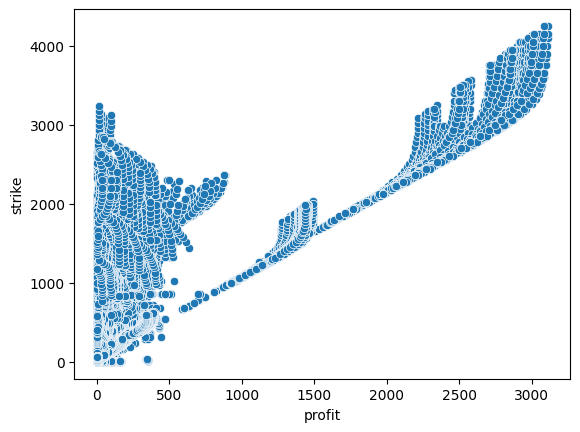

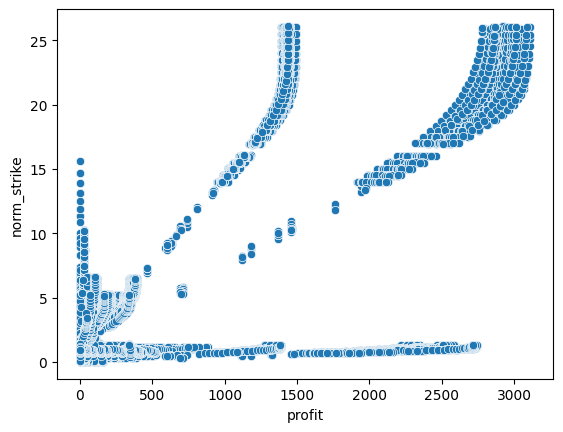

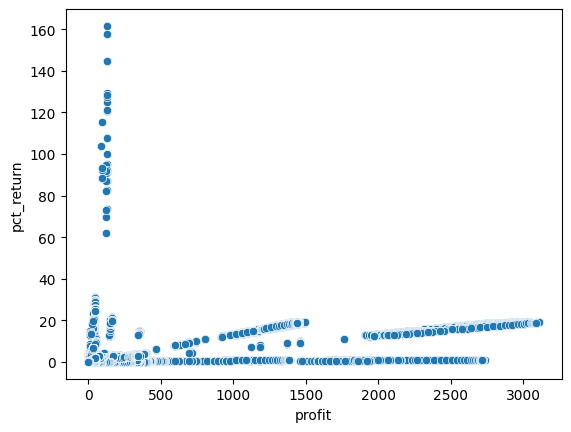

<Axes: xlabel='pct_return', ylabel='norm_strike'>

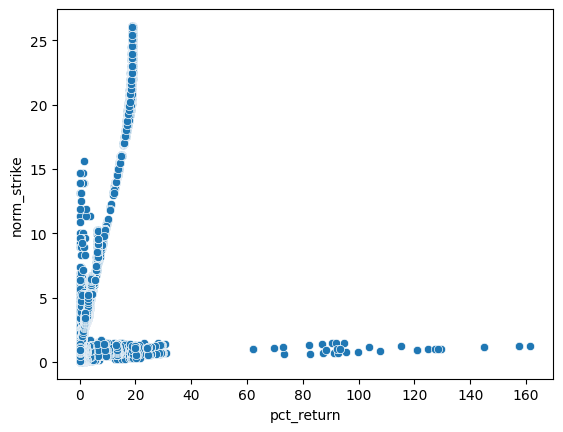

In [11]:
# graphs of strike price
pos_profit["norm_strike"] = pos_profit["strike"]/pos_profit["current_stock_price"]
pos_profit["pct_return"] = pos_profit["profit"]/pos_profit["current_stock_price"]
sns.scatterplot(x="profit", y="strike", data=pos_profit)
plt.show()
sns.scatterplot(x="profit", y="norm_strike", data=pos_profit)
plt.show()
sns.scatterplot(x="profit", y="pct_return", data=pos_profit)
plt.show()
sns.scatterplot(x="pct_return", y="norm_strike", data=pos_profit)